In [ ]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Make Participant List
participants = []
for i in range(1,18):
  if i != 1 and i!=12:
    participants.append("S"+ str(i))

print(participants)

participants_id = [x[1:] for x in participants]
print(participants_id)

# Make list of files
file_list = ['resampled_ACC_x.csv', 'resampled_ACC_y.csv', 'resampled_ACC_z.csv', 'resampled_BVP.csv', 'resampled_EDA.csv', 'resampled_TEMP.csv']

['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17']
['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17']


In [ ]:
def getParticipantRData(participant):
  # gets participant resampled data. only ACC.csv won't be upsampled


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalizeData(data):
  # field: "BVP", "EDA", ...
  # data: dataframe 

  train_data = data.to_numpy()
  scaler = MinMaxScaler(feature_range=(-1,1))
  normalized_data = scaler.fit_transform(train_data.reshape(-1,1))

  return normalized_data

In [ ]:
def saveNormalizedData(participant, file_name):

  # participant: int representing participant

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/S{}/'.format(participant, participant)

  data = pd.read_csv(path + file_name)

  # normalize data & convert numpy array to pandas df
  norm_data = pd.DataFrame(normalizeData(data))

  # save file
  norm_data.to_csv(os.path.join(path, 'norm_{}'.format(file_name)), index=False)
  
  return norm_data

In [ ]:
# testing

norm_test = saveNormalizedData(2, "resampled_BVP.csv")
display(norm_test)

,0
0,-0.169118
1,-0.177054
2,-0.169118
3,-0.164770
4,-0.169118
...,...
1007881,-0.098065
1007882,-0.098489
1007883,-0.095684
1007884,-0.107897


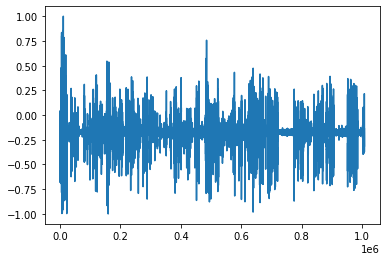

In [ ]:
plt.plot(norm_test)

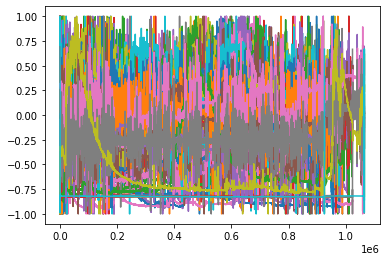

In [ ]:
for participant in participants_id:
  for file in file_list:
    data = saveNormalizedData(participant, file)
    plt.plot(data)

In [ ]:
"""
def normalizeFieldsByParticipant(field,participants):

  # participants: list of participants

  path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/S{}/{}'

  for participant in participants_id:
    data = pd.read_csv(path.format(participant, participant, field))

    saved_path = '/content/drive/My Drive/stress_data_unzipped/WESAD/S{}/S{}/normalized_data/{}_{}.csv'

    data = normalizeData(field,data)
"""